In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import partial_trace, Statevector
from qiskit.visualization import array_to_latex
from qiskit.circuit.library import MCMT
from qiskit.circuit.library import ZGate, XGate
import numpy as np

In [2]:
N = 4
j = 6


def createSFblock(N, j):
    
    circuit = QuantumCircuit(N)
    
    state_decimal = format(j, '0'+str(N)+'b')[::-1] # inverse order due to Qiskit order: |q1q0>
    
    for qubit in range(N):
        if state_decimal[qubit] == '0':
            circuit.x(qubit)
    
    multiConrolledZ = ZGate().control(num_ctrl_qubits=N-1)
    circuit.append(multiConrolledZ, range(N))
    
    for qubit in range(N):
        if state_decimal[qubit] == '0':
            circuit.x(qubit)
    
    return circuit


def initializeState(N, j):
    
    circuit = QuantumCircuit(N)
    
    state_decimal = format(j, '0'+str(N)+'b')
    print(state_decimal)
    
    for qubit in range(N):
        if state_decimal[qubit] == '1':
            circuit.x(qubit)
    circuit.barrier()
    
    return circuit

0110


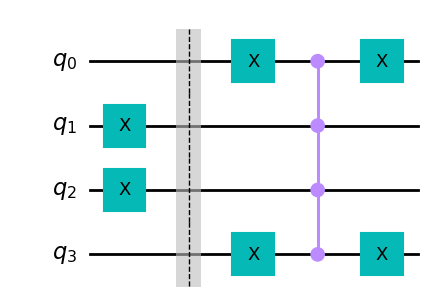

<IPython.core.display.Latex object>

In [4]:
sf_circuit_SF_block = initializeState(N, j)
sf_circuit_SF_block = sf_circuit_SF_block.compose(createSFblock(N, j))

display(sf_circuit_SF_block.draw('mpl'))

psi = Statevector(sf_circuit_SF_block)
display(psi.draw('latex'))

In [5]:
def createCNnotBlock(N, j):
    
    circuit = QuantumCircuit(N+1)
    
    state_decimal = format(j, '0'+str(N)+'b')
    
    for qubit in range(N):
        if state_decimal[qubit] == '0':
            circuit.x(qubit)
    
    circuit.mcx(control_qubits=[i for i in range(N)], target_qubit=N)
    
    for qubit in range(N):
        if state_decimal[qubit] == '0':
            circuit.x(qubit)
    
    return circuit

def initializeStateAndAncilla(N, j):
    
    circuit = QuantumCircuit(N+1)
    
    state_decimal = format(j, '0'+str(N)+'b')
    print(state_decimal)
    
    for qubit in range(N):
        if state_decimal[qubit] == '1':
            circuit.x(qubit)
            
    circuit.x(N)
    circuit.h(N)
    circuit.barrier()
    
    return circuit

0110


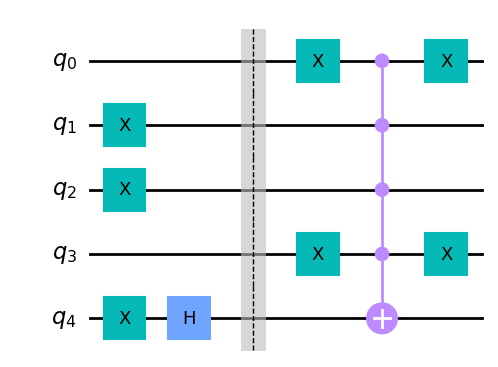

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [6]:
sf_circuit_cnot_block = initializeStateAndAncilla(N, j)
sf_circuit_cnot_block = sf_circuit_cnot_block.compose(createCNnotBlock(N, j))

display(sf_circuit_cnot_block.draw('mpl'))

full_state = Statevector(sf_circuit_cnot_block)

display(full_state.draw('latex'))


partial_density_matrix = partial_trace(full_state, N)
partial_statevector = partial_density_matrix.to_statevector()

display(partial_statevector.draw('latex'))


partial_density_matrix_ancilla = partial_trace(full_state, range(N))
partial_statevector_ancilla = partial_density_matrix_ancilla.to_statevector()

display(partial_statevector_ancilla.draw('latex'))

In [7]:
def createCNnotBlockNoXs(N, j):
    
    circuit = QuantumCircuit(N+1)
    
    state_decimal = format(j, '0'+str(N)+'b')
    
    multiConrolledX = XGate().control(num_ctrl_qubits=N, ctrl_state=state_decimal)
    circuit.append(multiConrolledX, range(N+1))

    return circuit

0110


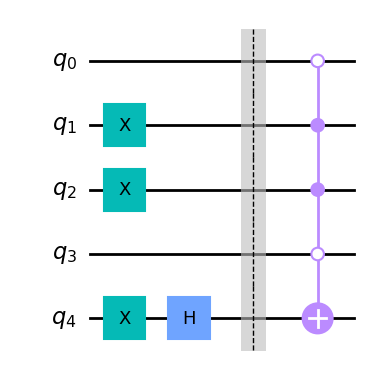

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [8]:
sf_circuit_cnot_block_noxs = initializeStateAndAncilla(N, j)
sf_circuit_cnot_block_noxs = sf_circuit_cnot_block_noxs.compose(createCNnotBlockNoXs(N, j))

display(sf_circuit_cnot_block_noxs.draw('mpl'))

full_state = Statevector(sf_circuit_cnot_block_noxs)

display(full_state.draw('latex'))


partial_density_matrix = partial_trace(full_state, N)
partial_statevector = partial_density_matrix.to_statevector()

display(partial_statevector.draw('latex'))


partial_density_matrix_ancilla = partial_trace(full_state, range(N))
partial_statevector_ancilla = partial_density_matrix_ancilla.to_statevector()

display(partial_statevector_ancilla.draw('latex'))

In [9]:
sf_circuit_SF_block.decompose(reps=1).depth()

38

In [10]:
#sf_circuit_SF_block.decompose(reps=1).draw('mpl')

In [11]:
sf_circuit_cnot_block.decompose(reps=3).depth()

84

In [12]:
#sf_circuit_cnot_block.decompose(reps=3).draw('mpl')

In [13]:
sf_circuit_cnot_block_noxs.decompose(reps=5).depth()

84

In [14]:
#sf_circuit_cnot_block_noxs.decompose(reps=5).draw('mpl')